2d image       03/09/2025   image classification /digit classification

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_squared_error


Train X shape: (60000, 28, 28)
Train Y shape: (60000,)
Test X shape: (10000, 28, 28)
Test Y shape: (10000,)
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8534 - loss: 0.4851 - val_accuracy: 0.9553 - val_loss: 0.1396
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9611 - loss: 0.1287 - val_accuracy: 0.9600 - val_loss: 0.1300
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9723 - loss: 0.0914 - val_accuracy: 0.9683 - val_loss: 0.1033
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9762 - loss: 0.0757 - val_accuracy: 0.9651 - val_loss: 0.1134
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9811 - loss: 0.0588 - val_accuracy: 0.9673 - val_loss: 0.1084
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error on test set: 0.0049496913566710946


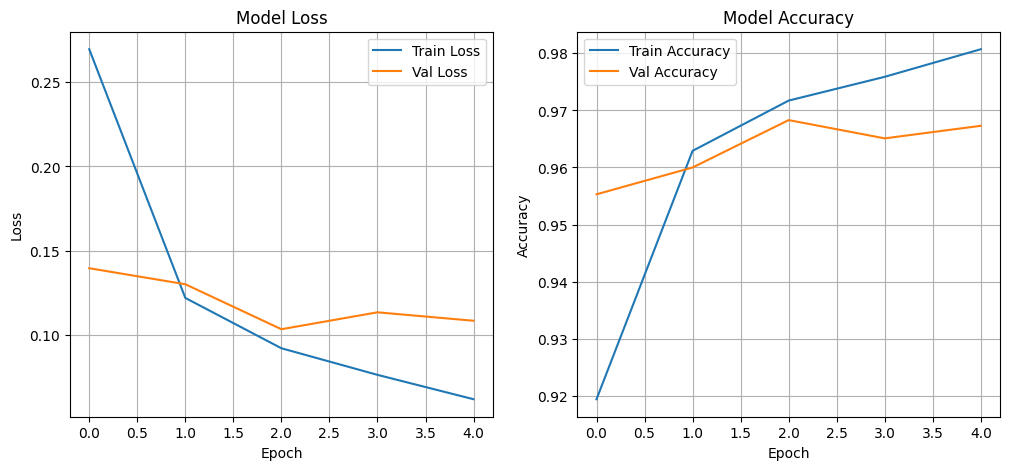

In [52]:

def build_model():
    inputs = Input(shape=(28, 28))
    x = Flatten()(inputs)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def main():
    model = build_model()
    (trainX, trainY), (testX, testY) = mnist.load_data()
    print("Train X shape:", trainX.shape)
    print("Train Y shape:", trainY.shape)
    print("Test X shape:", testX.shape)
    print("Test Y shape:", testY.shape)

    trainX = trainX.astype('float32') / 255.0
    testX = testX.astype('float32') / 255.0

    trainY_cat = to_categorical(trainY, 10)
    testY_cat = to_categorical(testY, 10)

    history = model.fit(trainX, trainY_cat,
                        validation_data=(testX, testY_cat),
                        epochs=5,
                        batch_size=32)

    predY = model.predict(testX)
    mse = mean_squared_error(testY_cat, predY)
    print("Mean Squared Error on test set:", mse)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.grid()
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.grid()
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

if __name__ == "__main__":
    main()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8493 - loss: 0.4789 - val_accuracy: 0.9600 - val_loss: 0.1321
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9634 - loss: 0.1230 - val_accuracy: 0.9672 - val_loss: 0.1080
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9736 - loss: 0.0884 - val_accuracy: 0.9716 - val_loss: 0.0957
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9783 - loss: 0.0703 - val_accuracy: 0.9702 - val_loss: 0.0995
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9826 - loss: 0.0547 - val_accuracy: 0.9727 - val_loss: 0.0977
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error on test set: 0.004227815910701168


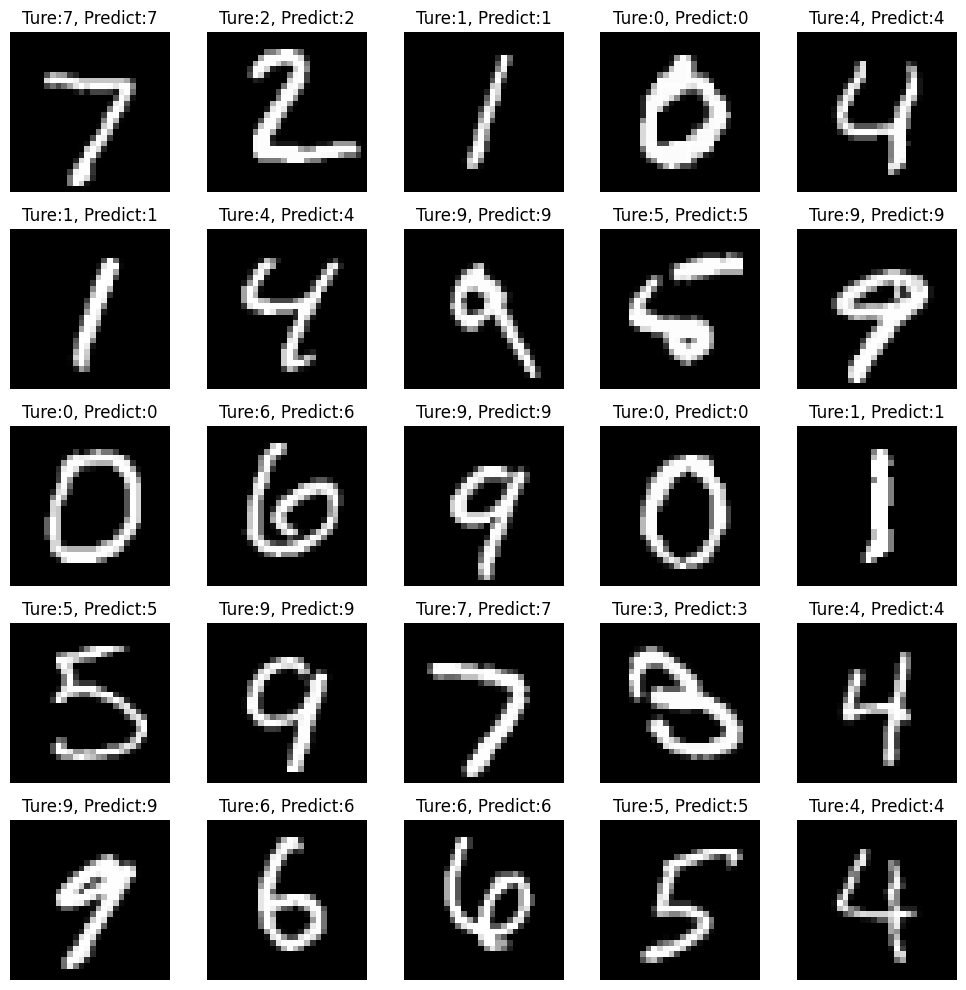

In [51]:

def build_model():
    inputs = Input(shape=(28, 28))
    x = Flatten()(inputs)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def main():
    model = build_model()
    (trainX, trainY), (testX, testY) = mnist.load_data()

    trainX = trainX.astype('float32') / 255.0
    testX = testX.astype('float32') / 255.0

    trainY_cat = to_categorical(trainY, 10)
    testY_cat = to_categorical(testY, 10)

    history = model.fit(trainX, trainY_cat,
                        validation_data=(testX, testY_cat),
                        epochs=5,
                        batch_size=32)

    predY = model.predict(testX)
    mse = mean_squared_error(testY_cat, predY)
    print("Mean Squared Error on test set:", mse)

    # Plot 5x5 grid of first 25 test images with true and predicted labels
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(testX[i], cmap='gray')
        pred_label = np.argmax(predY[i])
        true_label = testY[i]
        plt.title(f"Ture:{true_label}, Predict:{pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8473 - loss: 0.4987 - val_accuracy: 0.9612 - val_loss: 0.1274
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9639 - loss: 0.1217 - val_accuracy: 0.9613 - val_loss: 0.1194
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9738 - loss: 0.0848 - val_accuracy: 0.9716 - val_loss: 0.0972
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9793 - loss: 0.0688 - val_accuracy: 0.9721 - val_loss: 0.0970
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9812 - loss: 0.0589 - val_accuracy: 0.9695 - val_loss: 0.0962
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error on test set: 0.004463462243808941


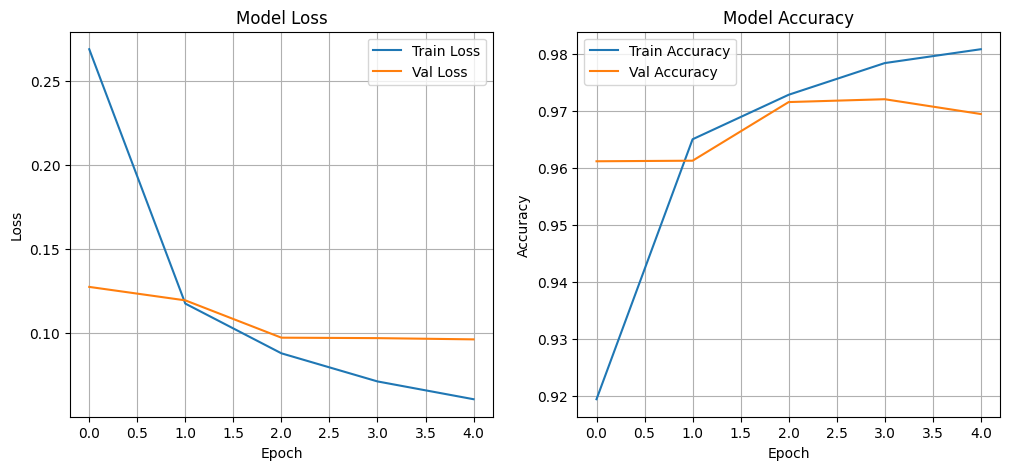

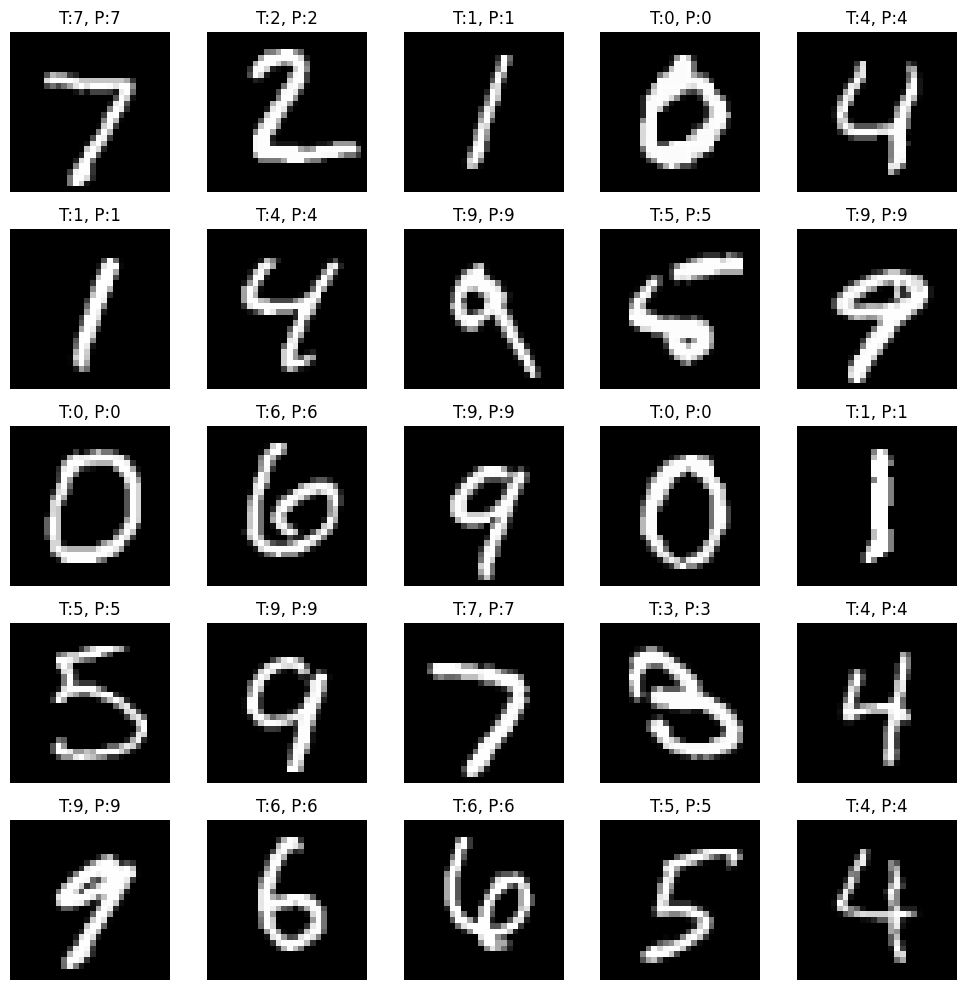

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_squared_error

def build_model():
    inputs = Input(shape=(28, 28))
    x = Flatten()(inputs)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def load_data():
    (trainX, trainY), (testX, testY) = mnist.load_data()
    trainX = trainX.astype('float32') / 255.0
    testX = testX.astype('float32') / 255.0
    trainY_cat = to_categorical(trainY, 10)
    testY_cat = to_categorical(testY, 10)
    return trainX, trainY, trainY_cat, testX, testY, testY_cat

def train_model(model, trainX, trainY_cat, testX, testY_cat, epochs=5, batch_size=32):
    history = model.fit(trainX, trainY_cat,
                        validation_data=(testX, testY_cat),
                        epochs=epochs,
                        batch_size=batch_size)
    return history

def evaluate_model(model, testX, testY_cat):
    predY = model.predict(testX)
    mse = mean_squared_error(testY_cat, predY)
    print("Mean Squared Error on test set:", mse)
    return predY, mse

def plot_history(history):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

def plot_predictions(testX, testY, predY, n=25):
    plt.figure(figsize=(10,10))
    for i in range(n):
        plt.subplot(5,5,i+1)
        plt.imshow(testX[i], cmap='gray')
        plt.title(f"T:{testY[i]}, P:{np.argmax(predY[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def main():
    model = build_model()
    trainX, trainY, trainY_cat, testX, testY, testY_cat = load_data()
    history = train_model(model, trainX, trainY_cat, testX, testY_cat)
    predY, mse = evaluate_model(model, testX, testY_cat)
    plot_history(history)
    plot_predictions(testX, testY, predY)

if __name__ == "__main__":
    main()
